Due to a bug, there are many duplicate folders in a file system. You are given a 2D array paths, where paths[i] is an array representing an absolute path to the ith folder in the file system.

    For example, ["one", "two", "three"] represents the path "/one/two/three".

Two folders (not necessarily on the same level) are identical if they contain the same non-empty set of identical subfolders and underlying subfolder structure. The folders do not need to be at the root level to be identical. If two or more folders are identical, then mark the folders as well as all their subfolders.

    For example, folders "/a" and "/b" in the file structure below are identical. They (as well as their subfolders) should all be marked:
        /a
        /a/x
        /a/x/y
        /a/z
        /b
        /b/x
        /b/x/y
        /b/z
    However, if the file structure also included the path "/b/w", then the folders "/a" and "/b" would not be identical. Note that "/a/x" and "/b/x" would still be considered identical even with the added folder.

Once all the identical folders and their subfolders have been marked, the file system will delete all of them. The file system only runs the deletion once, so any folders that become identical after the initial deletion are not deleted.

Return the 2D array ans containing the paths of the remaining folders after deleting all the marked folders. The paths may be returned in any order.

 

Example 1:

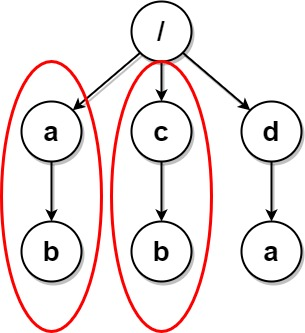

Input: paths = [["a"],["c"],["d"],["a","b"],["c","b"],["d","a"]]
Output: [["d"],["d","a"]]
Explanation: The file structure is as shown.
Folders "/a" and "/c" (and their subfolders) are marked for deletion because they both contain an empty
folder named "b".

Example 2:

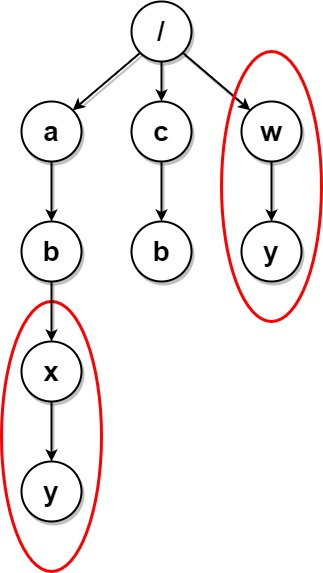

Input: paths = [["a"],["c"],["a","b"],["c","b"],["a","b","x"],["a","b","x","y"],["w"],["w","y"]]
Output: [["c"],["c","b"],["a"],["a","b"]]
Explanation: The file structure is as shown. 
Folders "/a/b/x" and "/w" (and their subfolders) are marked for deletion because they both contain an empty folder named "y".
Note that folders "/a" and "/c" are identical after the deletion, but they are not deleted because they were not marked beforehand.

Example 3:

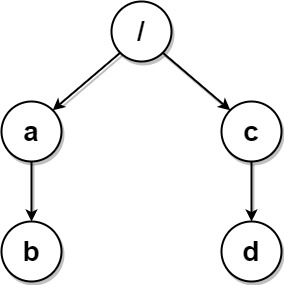

Input: paths = [["a","b"],["c","d"],["c"],["a"]]
Output: [["c"],["c","d"],["a"],["a","b"]]
Explanation: All folders are unique in the file system.
Note that the returned array can be in a different order as the order does not matter.

 

Constraints:

    1 <= paths.length <= 2 * 104
    1 <= paths[i].length <= 500
    1 <= paths[i][j].length <= 10
    1 <= sum(paths[i][j].length) <= 2 * 105
    path[i][j] consists of lowercase English letters.
    No two paths lead to the same folder.
    For any folder not at the root level, its parent folder will also be in the input.



In [ ]:
class Trie:
    # current node structure's serialized representation
    serial: str = ""
    # current node's child nodes
    children: dict

    def __init__(self):
        self.children = dict()


class Solution:
    def deleteDuplicateFolder(self, paths: List[List[str]]) -> List[List[str]]:
        # root node
        root = Trie()

        for path in paths:
            cur = root
            for node in path:
                if node not in cur.children:
                    cur.children[node] = Trie()
                cur = cur.children[node]

        # hash table records the occurrence times of each serialized representation
        freq = Counter()

        # post-order traversal based on depth-first search, calculate the serialized representation of each node structure
        def construct(node: Trie) -> None:
            # if it is a leaf node, then the serialization is represented as an empty string, and no operation is required.
            if not node.children:
                return

            v = list()
            # if it is not a leaf node, the serialization representation of the child node structure needs to be calculated first.
            for folder, child in node.children.items():
                construct(child)
                v.append(folder + "(" + child.serial + ")")

            # to prevent issues with order, sorting is needed
            v.sort()
            node.serial = "".join(v)
            # add to hash table
            freq[node.serial] += 1

        construct(root)

        ans = list()
        # record the path from the root node to the current node.
        path = list()

        def operate(node: Trie) -> None:
            # if the serialization appears more than once in the hash table, it needs to be deleted.
            if freq[node.serial] > 1:
                return
            # otherwise add the path to the answer
            if path:
                ans.append(path[:])

            for folder, child in node.children.items():
                path.append(folder)
                operate(child)
                path.pop()

        operate(root)
        return ans